## Regression 

### Simple Linear Regression

Linear regression is  a linear or straight line relationship between the input variables (X) and the single output variable (y).

<img src='images/lr.png' width="45%"/>

### Let us consider a dataset where we have a value of response y for every feature x:

In [1]:
import numpy as np

x = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
y = np.array([1, 3, 2, 5, 7, 8, 8, 9, 10, 12])

### x as a feature vector and y as a response vector

### A scatter plot of above dataset looks like:-

In [2]:
import matplotlib.pyplot as plt
plt.scatter(x,y,color='red')

# putting labels
plt.xlabel('x')
plt.ylabel('y')
plt.show()

<Figure size 640x480 with 1 Axes>

#### Now, the task is to find a line which fits best in above scatter plot so that we can predict the response for any new feature values. (i.e a value of x not present in dataset)

- This line is called regression line.

<img src="images/lin_reg.PNG" width="20%"/>
<img src="images/bfind.PNG" width="90%"/>

In [3]:
### find m and b

In [4]:
def find_m_b(x,y):
    m= (((np.mean(x)*np.mean(y))-np.mean(x*y))/
        ((np.mean(x)**2)-np.mean(x**2)))
    b = np.mean(y) - m*np.mean(x)
   
    return m,b

In [5]:
m,b = find_m_b(x,y)
print (m,b)

1.1696969696969695 1.2363636363636372


In [6]:
reg=[]
for i in x:
    reg.append((m*i+b))

In [7]:
#reg

In [8]:
#m*2+b

In [9]:
regression_line = [(m*i+b) for i in x]    

In [10]:
#regression_line

In [11]:
#y_pred

In [12]:
(4.5*m)+b

6.5

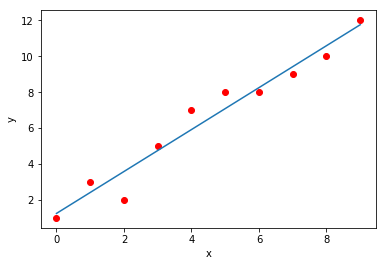

In [13]:
# for visualization
plt.scatter(x,y,color='red')

plt.plot(x, reg)

plt.xlabel('x')
plt.ylabel('y')
plt.show()


### R^2 (coefficient of determination):regression score function.


- The R^2 (or R Squared) metric provides an indication
  of the goodness of fit of a set of predictions to the
  actual values. In statistical literature,
  this measure is called the coefficient of determination.

- a model fits the data well if the differences between the
  observed values and the model's predicted values are small.

- R-squared is a statistical measure of how close the data
  are  to the fitted regression line.

- the higher the R-squared, the better the model fits your
  data.

- value between 0 and 1 

- The distance between the regression line's y values,
  and the data's y values is the error, then we square that. 


<img src='images/r2.PNG' width='40%'/>

### 1-((sum of the squared error of the line) / (sum of squared error of the y mean))

- **SE line** = (y1-(mx1+b))+(y2-(mx2+b))+.....(yn-(mxn+b))


- **SE y mean** = (y1-mean(y))+(y2-mean(y))+....(yn-mean(y))

if SE line is small ==> line is a good fit or r^2 close to 1

if SE line is large ===> r^2 close to 0 (i.e line is not fitted well)



<img src="images/rsq.png" />

In [14]:
def squared_error(ys_original,ys_line):
    return sum((ys_line-ys_original)**2)

In [15]:
def coefficient_of_determination(ys_orig,ys_line):
    y_mean=[]
    for i in ys_orig:
        y_mean.append(np.mean(ys_orig))
        
    #y_mean_line = [np.mean(ys_orig) for y in ys_orig]
    squared_error_regr = squared_error(ys_orig, ys_line)
    squared_error_y_mean = squared_error(ys_orig, y_mean)
    return 1 - (squared_error_regr/squared_error_y_mean)

In [16]:
r_squared = coefficient_of_determination(y,regression_line)
print(r_squared)

0.952538038613988


In [17]:
(6.5*m)+b

8.83939393939394

### Now Using scikit-learn...

In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [19]:
x.ndim

1

In [20]:
x.reshape(-1,1).ndim

2

In [21]:
x_new=x.reshape(-1,1)

In [22]:
x_new.ndim

2

In [23]:
lg = LinearRegression()
#lg.fit(x_new,y)

In [24]:
#fit(x,y):train model/algorithm with data
#predict():make prediction

In [25]:
lg.fit(x_new,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [26]:
lg.coef_

array([1.16969697])

In [27]:
lg.intercept_

1.2363636363636363

In [28]:
#x_new[1]

In [29]:
#x_new[1][0]*lg.coef_[0]+lg.intercept_

In [30]:
y_pred=lg.predict(x_new)

#y_true,y_pred
r2_score(y,y_pred)

0.952538038613988

In [31]:
np.array([[4.5],[6.7]]).shape

(2, 1)

In [32]:
lg.predict([[4.5],[6.7]])

array([6.5       , 9.07333333])

In [33]:
#(4.5*lg.coef_[0])+lg.intercept_

### Take another example

In [34]:
import pandas as pd
import numpy as np
from sklearn.metrics import r2_score

In [35]:
#r2_score:for checking regression model performance

In [36]:
data = pd.read_csv('dataset/Salary_Data.csv')

In [37]:
data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [38]:
data.shape

(30, 2)

In [39]:
#data.iloc[:,0].values

In [40]:
#print data.columns

In [41]:
X = data.iloc[:,0].values
X

array([ 1.1,  1.3,  1.5,  2. ,  2.2,  2.9,  3. ,  3.2,  3.2,  3.7,  3.9,
        4. ,  4. ,  4.1,  4.5,  4.9,  5.1,  5.3,  5.9,  6. ,  6.8,  7.1,
        7.9,  8.2,  8.7,  9. ,  9.5,  9.6, 10.3, 10.5])

In [42]:
y = data['Salary'].values

In [43]:
X.ndim

1

### split data into training and testing test

In [44]:
from sklearn.model_selection import train_test_split

In [45]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=7,random_state=0)

In [67]:
y_test

array([ 37731., 122391.,  57081.,  63218., 116969., 109431., 112635.])

In [47]:
X_train.ndim

1

In [48]:
X_new=X_train.reshape(-1,1)
X_test_new = X_test.reshape(-1,1)

In [49]:
from sklearn.linear_model import LinearRegression

In [72]:
lin_reg = LinearRegression()  #model/algorithm

#train model using training data 
lin_reg.fit(X_new,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [73]:
lin_reg.coef_

array([9433.82143126])

In [74]:
lin_reg.intercept_

26344.902781960533

In [75]:
y_pred = lin_reg.predict(X_test_new)

In [54]:
y_test

array([ 37731., 122391.,  57081.,  63218., 116969., 109431., 112635.])

In [55]:
y_pred

array([ 40495.63492885, 123513.26352394,  65023.57065013,  63136.80636388,
       115966.20637893, 108419.14923393, 116909.58852206])

In [56]:
#actual,pred
r2_score(y_test,y_pred)

0.9871517951271144

In [57]:
### Deal with categorical features
##nominal
##ordinal
#pandas,scikit

In [58]:
X_test_new[0]

array([1.5])

In [59]:
(lin_reg.coef_[0]*X_test_new[0])+lin_reg.intercept_

array([40495.63492885])

In [60]:
y_pred[0]

40495.63492885107

In [61]:
#!pip install matplotlib

In [62]:
import matplotlib.pyplot as plt

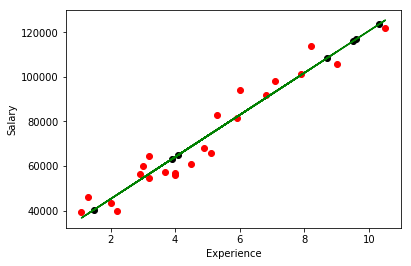

In [63]:
#plt.figure(figsize=(10,8))
plt.scatter(X_train,y_train,color='red')   #training data

plt.scatter(X_test,y_pred,color='black')   #testing data
plt.plot(X_train,lin_reg.predict(X_train.reshape(-1,1)),color='green')
plt.xlabel('Experience')
plt.ylabel('Salary')
plt.show()

In [64]:
#sse depends on coff and intercept

#DL to make error low as possible by tunning the paremeters(m,b)